# Jigsaw Toxic Comment Classification

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *

In [4]:
from fastai.utils.mem import *

## Get the data

In [5]:
path = Config.data_path()/'jigsaw'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/jigsaw')

In [4]:
# ! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p {path}

  0%|                                               | 0.00/1.39M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.39M/1.39M [00:00<00:00, 151MB/s]
 21%|████████                              | 5.00M/23.4M [00:00<00:00, 21.4MB/s]
100%|██████████████████████████████████████| 23.4M/23.4M [00:00<00:00, 77.8MB/s]
 34%|████████████▉                         | 9.00M/26.3M [00:00<00:00, 22.3MB/s]
100%|██████████████████████████████████████| 26.3M/26.3M [00:00<00:00, 52.5MB/s]
  0%|                                               | 0.00/1.46M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.46M/1.46M [00:00<00:00, 245MB/s]


In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/jigsaw/test.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/train.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/test_labels.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/sample_submission.csv.zip')]

In [6]:
# ! unzip /home/jupyter/.fastai/data/jigsaw/test.csv.zip -d {path}

Archive:  /home/jupyter/.fastai/data/jigsaw/test.csv.zip
  inflating: /home/jupyter/.fastai/data/jigsaw/test.csv  


In [7]:
# ! unzip /home/jupyter/.fastai/data/jigsaw/train.csv.zip -d {path}

Archive:  /home/jupyter/.fastai/data/jigsaw/train.csv.zip
  inflating: /home/jupyter/.fastai/data/jigsaw/train.csv  


In [8]:
# ! unzip /home/jupyter/.fastai/data/jigsaw/test_labels.csv.zip -d {path}

Archive:  /home/jupyter/.fastai/data/jigsaw/test_labels.csv.zip
  inflating: /home/jupyter/.fastai/data/jigsaw/test_labels.csv  


In [9]:
# ! unzip /home/jupyter/.fastai/data/jigsaw/sample_submission.csv.zip -d {path}

Archive:  /home/jupyter/.fastai/data/jigsaw/sample_submission.csv.zip
  inflating: /home/jupyter/.fastai/data/jigsaw/sample_submission.csv  


In [10]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/jigsaw/test.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/train.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/sample_submission.csv'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/test_labels.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/sample_submission.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/jigsaw/test_labels.csv')]

## Looking at the data

In [6]:
df_train = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')
df_sub = pd.read_csv(path/'sample_submission.csv')
df_test_labels = pd.read_csv(path/'test_labels.csv')

the training set, contains comments with their binary labels

In [17]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


the test set, you must predict the toxicity probabilities for these comments. To deter hand labeling, the test set contains some comments which are not included in scoring.

In [18]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


a sample submission file in the correct format

In [19]:
df_sub.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


labels for the test data; value of -1 indicates it was not used for scoring; (Note: file added after competition close!)

In [20]:
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


Oh, so is the above labels the anser key? I won't use it for the purpose of this learning then

## Training a Language Model

In [25]:
df_lm = pd.concat([df_train[['comment_text']], df_test[['comment_text']]])

NOTE: It seems like there is a DataBunch.add method that I could have used instead of doing the above

In [26]:
len(df_lm)

312735

In [27]:
df_lm.head(2)

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...


In [57]:
bs = 64

In [28]:
data_lm = (TextList.from_csv(path, 'train.csv', cols='comment_text')
              .random_split_by_pct(0.1, seed=42)
              .label_for_lm()
              .databunch())
data_lm.save('data_lm.pkl')

In [18]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [31]:
data_lm.show_batch()

idx,text
0,"background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ) xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about"
1,"stop that straw man argument . xxmaj arvanitic is neutral and will not offend anyone xxup and has majority support here and will be used according to policy . xxmaj the world is not made to please you , neither is xxmaj wikipedia . xxmaj we have policies that must be observed , so if you want to use xxmaj wikipedia , you will just have to accept them ."
2,to keep us down ( and sometimes other ignorant groups of people ) . i will never surrender to being xxmaj north xxmaj american and nor should any other xxmaj central xxmaj american should ever buy into this . i do n't care what the xxmaj white man tells us . xxmaj they 're not us . xxmaj we should be able to decide for ourselves who we are and
3,"i 'm stupid enough not to see it . i 'd like some answers , people . xxmaj ryan , i have sent you several messages by private e - mail . i hope to get substantive replies to my questions , including , "" "" who have i attacked ? "" "" "" xxbos "" \n \n xxmaj harry xxmaj potter and the xxmaj deathly xxmaj printing -"
4,"prison and her difficulties to lead her life on her own are interspersed with what she regards as the key events of her relationship with xxmaj kevin . xxmaj the massacre is saved until the end , and is more of a "" "" xxunk "" "" that a "" "" xxunk "" "" . "" "" \n \n strikes me as misdirection . i propose to remove it"


In [59]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


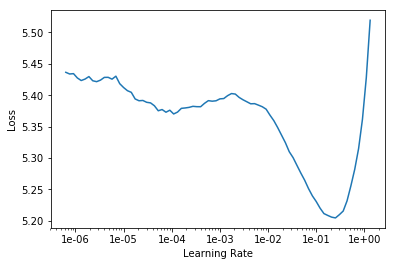

In [39]:
learn.recorder.plot(skip_end=10)

In [40]:
lr = 4e-2

In [41]:
learn.fit_one_cycle(1, max_lr=lr)

epoch,train_loss,valid_loss,accuracy,time
1,4.389938,4.119446,0.303670,24:06


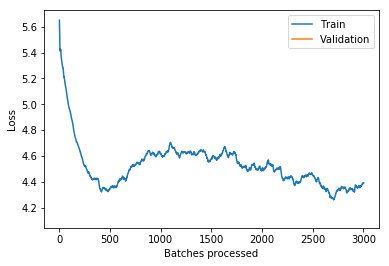

In [42]:
learn.recorder.plot_losses()

In [43]:
learn.save('lm_fit_head_1.pkl')

In [44]:
learn.fit_one_cycle(1, max_lr=1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,4.173449,3.997098,0.315354,24:06


In [45]:
learn.save('lm_fit_head_2.pkl')

In [60]:
learn.load('lm_fit_head_2.pkl')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (143614 items)
x: LMTextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj xxunk ! xxmaj he matches this background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ),xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info .,xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " ty

In [48]:
learn.predict('This is truly', n_words=30)

'This is truly an article with a long critique is an opinion concerning ancient De Material Chinese are mentioned . you would like to LOOK as Anthropological'

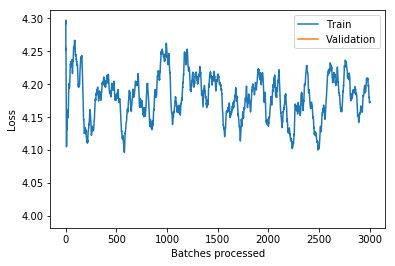

In [49]:
learn.recorder.plot_losses()

In [65]:
learn.save_encoder('lm_enc_1.pkl')

In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


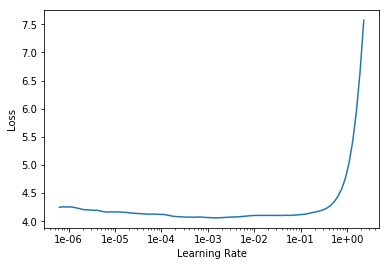

In [62]:
learn.recorder.plot()

In [63]:
learn.unfreeze()

In [64]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,3.748611,3.757693,0.342800,27:14
2,3.690238,3.633193,0.359385,27:44
3,3.560245,3.567172,0.368373,27:54
4,3.446520,3.536128,0.372395,27:19
5,3.405068,3.532228,0.373641,27:24


In [65]:
learn.save('lm_fine_tuned_1.pkl')

In [66]:
learn.save_encoder('lm_enc_2.pkl')

## Classifier

In [55]:
data_clas = (TextList.from_csv(path, 'train.csv', cols='comment_text', vocab=data_lm.train_ds.vocab)
                .random_split_by_pct(0.1, seed=42)
                .label_from_df(cols=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], label_cls=MultiCategoryList)
                .databunch())
data_clas.save('data_clas.pkl')

In [8]:
bs = 16

In [9]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [9]:
data_clas.show_batch()

text,target
xxbos xxmaj take that ! \n \n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in,toxic;severe_toxic;obscene
"xxbos "" = = xxmaj literal text = = \n i have changed "" "" xxmaj according to the literal text of the constitution , the xxmaj governor - xxmaj general is the representative of the xxmaj queen of xxmaj australia . "" "" to refer to xxmaj queen xxmaj victoria instead . i did this to make a point and that point is that the literal text of",
"xxbos "" \n \n xxmaj moving xxmaj ahead \n i just found that i am unblocked now . xxmaj this block reminded me of xxmaj hkelkar , xxmaj xxunk combination who used to get me blocked very often in very similar fashion . xxmaj the longest block so far . xxmaj perhaps , longer ones are in the way ! xxmaj people have already threatened it on my",
"xxbos "" \n \n xxmaj let 's put it this way xxmaj flo , everyone has talked past me here for months . xxmaj it is absolutely frustrating to have everything i contribute get labeled as "" "" disruptive . "" "" xxmaj disruptive , how ? xxmaj xxunk , how ? i sure as heck do n't feel that i have done so because as far as i",
"xxbos kash jaffrey \n \n xxmaj one of the most prominent xxmaj calgary , xxmaj canada based financial speculator . xxmaj one of the most prominent xxmaj calgary , xxmaj canada based financial speculator . xxmaj one of the most prominent xxmaj calgary , xxmaj canada based financial speculator . xxmaj one of the most prominent xxmaj calgary , xxmaj canada based financial speculator . xxmaj one of the",


In [10]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('lm_enc_2.pkl')

In [70]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


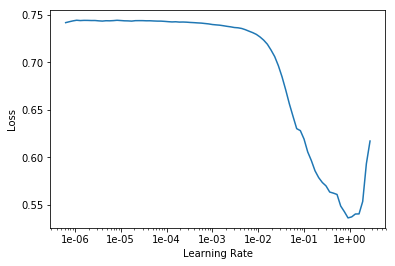

In [71]:
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
1,0.090826,0.072702,11:38


In [73]:
learn.save('clas_1.pkl')

In [21]:
learn.load('clas_1.pkl')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (143614 items)
x: TextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj xxunk ! xxmaj he matches this background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ),xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info .,xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " types o

In [7]:
gpu_mem_get_free_no_cache()

7132

In [23]:
gc.collect()

278

In [24]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
1,0.076265,0.086752,13:39


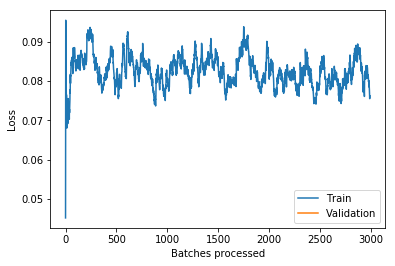

In [25]:
learn.recorder.plot_losses()

In [26]:
learn.save('clas_2.pkl')

In [11]:
learn.load('clas_2.pkl')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (143614 items)
x: TextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj xxunk ! xxmaj he matches this background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ),xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info .,xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " types o

In [27]:
learn.predict('you are a horrible person')

(<fastai.core.MultiCategory at 0x7f52f159f278>,
 tensor([1., 1., 1., 0., 1., 0.]),
 tensor([0.9892, 0.6100, 0.9617, 0.0825, 0.9576, 0.4250]))

In [12]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-4/(2.6**4),5e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
1,0.072116,0.258064,21:28


In [13]:
learn.save('clas_3.pkl')

In [11]:
learn.load('clas_3.pkl')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (143614 items)
x: TextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj xxunk ! xxmaj he matches this background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ),xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info .,xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " types o

In [12]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-4/(2.6**4),1e-4), moms=(0.8,0.7), wd=0.1)

epoch,train_loss,valid_loss,time
1,0.075939,2.871023,1:18:53


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
learn.save('clas_4.pkl')

In [15]:
learn.load('clas_4.pkl')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (143614 items)
x: TextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj xxunk ! xxmaj he matches this background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ),xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info .,xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " types o

In [21]:
learn.data.classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [16]:
learn.export('export2.pkl')

## Kaggle Submission

In [22]:
df_sub.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [23]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Referenced from [here](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-planet.ipynb)

In [19]:
test = TextList.from_csv(path, 'test.csv', cols='comment_text', vocab=data_lm.train_ds.vocab)
len(test)

153164

In [21]:
learn = load_learner(path, 'export2.pkl', test=test)

In [22]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test, ordered=True)

In [23]:
len(preds), len(df_test)

(153164, 153164)

In [24]:
preds[0:10]

tensor([[9.9579e-01, 8.2411e-01, 9.8535e-01, 1.5749e-01, 9.7634e-01, 5.0756e-01],
        [9.3965e-03, 9.2679e-04, 4.0819e-03, 7.7069e-04, 3.6249e-03, 1.7699e-03],
        [6.5952e-03, 4.4143e-04, 3.3011e-03, 4.2092e-04, 1.8455e-03, 6.5294e-04],
        [1.0646e-03, 4.8477e-05, 5.1948e-04, 1.2634e-04, 3.1441e-04, 8.0446e-05],
        [1.4628e-02, 1.4454e-03, 6.2182e-03, 1.3891e-03, 4.8331e-03, 1.7438e-03],
        [3.4627e-03, 1.7482e-04, 1.0369e-03, 1.7141e-04, 9.5276e-04, 2.2237e-04],
        [2.6347e-03, 1.3182e-04, 1.6009e-03, 1.3985e-04, 9.2215e-04, 1.6593e-04],
        [2.1451e-01, 1.5369e-02, 8.0966e-02, 7.2036e-03, 7.7659e-02, 2.0880e-02],
        [1.9834e-02, 7.7849e-04, 8.4950e-03, 5.7264e-04, 6.0955e-03, 1.8352e-03],
        [1.4317e-02, 9.3339e-04, 6.2363e-03, 8.5561e-04, 5.1536e-03, 1.3089e-03]])

In [25]:
learn.predict(df_test['comment_text'][0])

(<fastai.core.MultiCategory at 0x7fe764275550>,
 tensor([1., 1., 1., 0., 1., 1.]),
 tensor([0.9960, 0.8330, 0.9862, 0.1620, 0.9776, 0.5164]))

In [26]:
learn.predict(df_test['comment_text'][1])

(<fastai.core.MultiCategory at 0x7fe7644f2e80>,
 tensor([0., 0., 0., 0., 0., 0.]),
 tensor([0.0097, 0.0009, 0.0042, 0.0008, 0.0037, 0.0018]))

In [30]:
len(learn.data.test_ds.items[0])

89

In [31]:
len(df_test['comment_text'][0])

367

In [32]:
len(df_test['comment_text'][1])

50

In [33]:
len(learn.data.test_ds.items[1])

21

In [27]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [46]:
df_sub.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [35]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [36]:
learn.data.classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [44]:
list(zip([p.item() for p in preds[0]], learn.data.classes))

[(0.5709000825881958, 'toxic'),
 (0.10613173991441727, 'severe_toxic'),
 (0.3612491488456726, 'obscene'),
 (0.029930224642157555, 'threat'),
 (0.3485136032104492, 'insult'),
 (0.05522124841809273, 'identity_hate')]

In [43]:
preds[0][0].item()

0.5709000825881958

In [45]:
preds[:,0][0]

tensor(0.5709)

In [30]:
ids = df_test['id']

In [48]:
ids[:10]

0    00001cee341fdb12
1    0000247867823ef7
2    00013b17ad220c46
3    00017563c3f7919a
4    00017695ad8997eb
5    0001ea8717f6de06
6    00024115d4cbde0f
7    000247e83dcc1211
8    00025358d4737918
9    00026d1092fe71cc
Name: id, dtype: object

In [49]:
{ i: clas for i,clas in enumerate(learn.data.classes) }

{0: 'toxic',
 1: 'severe_toxic',
 2: 'obscene',
 3: 'threat',
 4: 'insult',
 5: 'identity_hate'}

In [28]:
pred_vals = { clas: preds[:, i] for i, clas in enumerate(learn.data.classes) }

In [31]:
submission = pd.DataFrame({'id': ids, **pred_vals}, columns=['id', *learn.data.classes])

In [32]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.995795,0.824112,0.985355,0.157489,0.976339,0.507563
1,0000247867823ef7,0.009396,0.000927,0.004082,0.000771,0.003625,0.001770
2,00013b17ad220c46,0.006595,0.000441,0.003301,0.000421,0.001846,0.000653
3,00017563c3f7919a,0.001065,0.000048,0.000519,0.000126,0.000314,0.000080
4,00017695ad8997eb,0.014628,0.001445,0.006218,0.001389,0.004833,0.001744


In [33]:
submission.to_csv(path/'submission-2.csv', index=False)

In [34]:
! kaggle competitions submit jigsaw-toxic-comment-classification-challenge -f {path/'submission-2.csv'} -m "Try 2 - might have totally overfit"

100%|██████████████████████████████████████| 13.4M/13.4M [00:02<00:00, 5.33MB/s]
Successfully submitted to Toxic Comment Classification Challenge

Initial test submission: 4113 place of 4551 in private leaderboard = 90.4 percentile